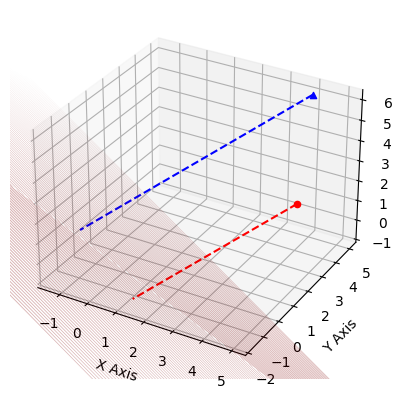

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Hyperplane equation: ax + by + cz + d = 0
a, b, c, d = 1, 1, 1, 1

# Sample data points: one close to the hyperplane and one farther away
point1 = np.array([5, 2, 3])
point2 = np.array([4, 5, 6])

# Function to find the nearest point on the hyperplane
def nearest_point_on_hyperplane(point, a, b, c, d):
    x, y, z = point
    t = -(a*x + b*y + c*z + d) / (a*a + b*b + c*c)
    return np.array([x + a*t, y + b*t, z + c*t])

# Find nearest points on the hyperplane for each sample point
nearest1 = nearest_point_on_hyperplane(point1, a, b, c, d)
nearest2 = nearest_point_on_hyperplane(point2, a, b, c, d)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(*point1, c='r', marker='o')
ax.scatter(*point2, c='b', marker='^')

# Plot the connecting lines to the hyperplane
ax.plot(*np.column_stack((point1, nearest1)), c='r', linestyle='--')
ax.plot(*np.column_stack((point2, nearest2)), c='b', linestyle='--')

# Create a grid of points on the hyperplane
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
zz = (-a * xx - b * yy - d) * 1.0 / c

# Plot the hyperplane
ax.add_collection3d(Poly3DCollection([list(zip(xx.flatten(), yy.flatten(), zz.flatten()))], alpha=0.3, facecolor='#800000'))

# Set axis labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Display the plot
plt.show()


In [15]:
# use the Python Reddit API Wrapper (PRAW) to interact with the Reddit API
import praw
import json
import csv
import time

In [16]:
# Function reads Reddit credentials from a JSON file and creates a Reddit object using the PRAW library. 
# It takes two arguments, the name of the JSON file and the key name for the Reddit credentials in the file.
def create_reddit_object(json_file="reddit_credentials.json",json_key="reddit"):
   
    # Use the extracted credentials to create a Reddit object
    with open (json_file) as file:
        data=json.load(file)
        # Extract the credentials from the dictionary using the specified key
        data=data[json_key]
        
 
    reddit=praw.Reddit(client_id=data['client_id'],
                       client_secret=data['client_secret'],
                       username=data['username'],
                       password=data['password'],
                       user_agent=data['user_agent'])
    
    return reddit


In [17]:
# Create a Reddit object using the credentials in the JSON file
reddit= create_reddit_object()


# Define the subreddits to scrape
subreddit_names = ["conservative", "liberal"]

# Loop through the subreddits
print("Scraping start")
for subreddit_name in subreddit_names:
    subreddit = reddit.subreddit(subreddit_name)
    start_time = time.time()
    print(f"\nScraping subreddit for {subreddit_name}...")
    comment_count = 0

    # Create a CSV file for the subreddit
    with open(f"{subreddit_name}.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Comment"])

        # Loop through the top 6000 hot posts to get 8000 comments
        for post in subreddit.hot(limit=6000):
            # Retrieve all comments
            post.comments.replace_more(limit=None)
            # Loop through all of the comments for the post and write the comment to the CSV file
            for comment in post.comments.list():
                # Check if the comment is not deleted and not removed
                if not comment.body == "[deleted]" and not comment.body == "[removed]":
                    writer.writerow([comment.body])
                    comment_count += 1
                # Break the loop if we have reached the desired number of comments
                if comment_count == 8000:
                    break
            # Break the loop if we have reached the desired number of comments
            if comment_count == 8000:
                break
                
print("\nScraping end")
end_time = time.time()
duration = (end_time - start_time)/60
print(f"\nScraping took {duration:.2f} mins.")

Scraping start

Scraping subreddit for conservative...

Scraping subreddit for liberal...

Scraping end

Scraping took 0.06 mins.
